In [1]:
#plotting and tabling
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import astropy
from astropy.io import fits


#pipeline
import jwst
from jwst.pipeline import Detector1Pipeline
from jwst.pipeline import Image2Pipeline
from jwst.pipeline import Image3Pipeline
from jwst.pipeline import Spec2Pipeline
from jwst.pipeline import Spec3Pipeline
#wcs
from jwst import assign_wcs
from jwst.assign_wcs import assign_wcs_step
from jwst.assign_wcs import AssignWcsStep
from jwst.extract_2d import Extract2dStep
#datamodels
from jwst import datamodels

In [2]:
fname = 'jw01089001001_01101_00008_nis_rate.fits'
specwcs='jwst_niriss_specwcs_8.asdf'
spc=datamodels.open(specwcs)
print(spc.meta.instrument.instance)


{'detector': 'NIS', 'filter': 'GR150C.conf', 'name': 'NIRISS', 'pupil': 'F200W'}


In [3]:
astep = AssignWcsStep()

out = astep.call(fname, override_specwcs=specwcs)
print(out.meta.instrument.instance)

2022-05-01 09:24:55,776 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2022-05-01 09:24:56,661 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2022-05-01 09:24:56,723 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args ('jw01089001001_01101_00008_nis_rate.fits',).
2022-05-01 09:24:56,726 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2022-05-01 09:24:57,387 - stpipe.AssignWcsStep - INFO - COMPLETED assign_wcs
2022-05-01 09:24:57,404 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep done


{'detector': 'NIS', 'filter': 'GR150C', 'filter_position': 354.2111, 'focus_position': 0.0, 'name': 'NIRISS', 'pupil': 'F200W', 'pupil_position': 164.8715}


In [4]:
out.save('jw01089001001_01101_00008_nis_assign_wcs.fits')

'jw01089001001_01101_00008_nis_assign_wcs.fits'

In [6]:
out.meta.source_catalog="my_mosaic_f200_cat.ecsv"
exout = Extract2dStep.call(out, mmag_extract=19)
exout.save('jw01089001001_01101_00008_nis_ex2d.fits')

2022-05-01 09:25:42,783 - stpipe.Extract2dStep - INFO - Extract2dStep instance created.
2022-05-01 09:25:42,928 - stpipe.Extract2dStep - INFO - Step Extract2dStep running with args (<ImageModel(2048, 2048) from jw01089001001_01101_00008_nis_assign_wcs.fits>,).
2022-05-01 09:25:42,930 - stpipe.Extract2dStep - INFO - Step Extract2dStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'slit_name': None, 'extract_orders': None, 'tsgrism_extract_height': None, 'wfss_extract_half_height': 5, 'grism_objects': None, 'mmag_extract': 19}
2022-05-01 09:25:42,955 - stpipe.Extract2dStep - INFO - EXP_TYPE is NIS_WFSS
2022-05-01 09:25:42,976 - stpipe.Extract2dStep - INFO - Extracting objects < abmag = 19
2022-05-01 09:25:42,976 - stpipe.Extract2dStep - INFO - Getting objects from my_mo

'jw01089001001_01101_00008_nis_ex2d.fits'

<IPython.core.display.Javascript object>


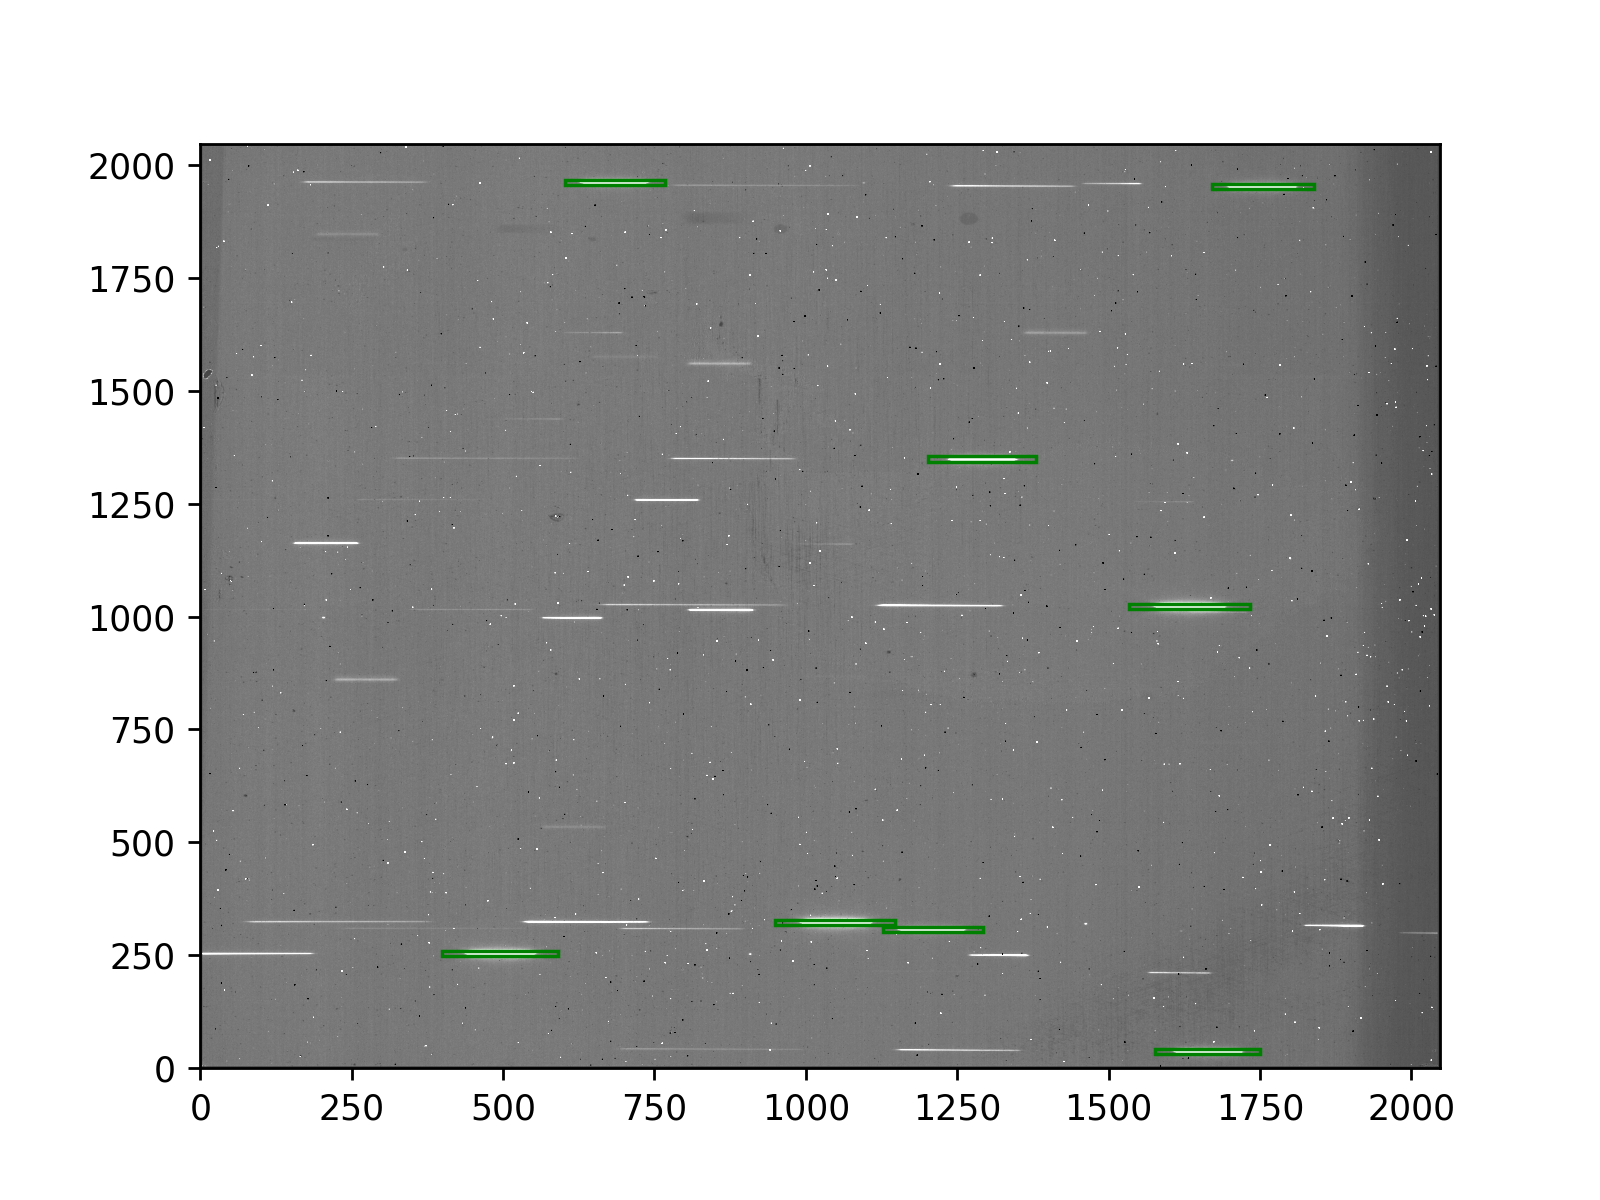

In [8]:
ax = plt.subplot()
# ax.imshow(out.data, aspect='auto', vmin=-.5, vmax=1.3, origin='lower')
# plt.gray()

for slit in exout.slits:
    #ax.scatter(slit.source_ypos, slit.source_xpos)
    bbox = slit.meta.wcs.bounding_box
    xstart, ystart = slit.xstart, slit.ystart
    #print('xstart  ', xstart, ystart)
    #print(slit.meta.wcsinfo.spectral_order)
    ax.add_patch(patches.Rectangle((bbox[0][0]+xstart, bbox[1][0]+ystart), 
                                   bbox[0][1]-bbox[0][0], bbox[1][1]-bbox[1][0], edgecolor='g',
                                  fill=False))
    
ax.imshow(out.data, aspect='auto', vmin=-.5, vmax=1.3, origin='lower')

plt.gray()



In [10]:
plt.savefig('V3_C')